In [13]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -U -r yolov5/requirements.txt  # install dependencies

%cd /content/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 3019 (delta 6), reused 9 (delta 4), pack-reused 2993
Receiving objects: 100% (3019/3019), 7.18 MiB | 32.25 MiB/s, done.
Resolving deltas: 100% (1990/1990), done.
Requirement already up-to-date: Cython in /usr/local/lib/python3.6/dist-packages (from -r yolov5/requirements.txt (line 4)) (0.29.21)
Requirement already up-to-date: matplotlib>=3.2.2 in /usr/local/lib/python3.6/dist-packages (from -r yolov5/requirements.txt (line 5)) (3.3.3)
Requirement already up-to-date: numpy>=1.18.5 in /usr/local/lib/python3.6/dist-packages (from -r yolov5/requirements.txt (line 6)) (1.19.4)
Requirement already up-to-date: opencv-python>=4.1.2 in /usr/local/lib/python3.6/dist-packages (from -r yolov5/requirements.txt (line 7)) (4.4.0.46)
Requirement already up-to-date: Pillow in /usr/local/lib/python3.6/dist-packages (from -r yolov5/re

In [2]:
import torch
from IPython.display import Image
from utils.google_utils import gdrive_download

In [9]:
!pip install -U -q PyDrive 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth 
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drvie = GoogleDrive(gauth)

from google.colab import drive 

drive.mount('/content/drive')
!unzip "/content/drive/My Drive/chess_pieces.zip" -d "/content/"

Mounted at /content/drive
Archive:  /content/drive/My Drive/chess_pieces.zip
 extracting: /content/test/images/7a34d8620235048917b28bcfd3b5572b_jpg.rf.182f59c512dcb99ed53da97dfe2d3d85.jpg  
 extracting: /content/test/images/a3863d0be6002c21b20ac88817b2c56f_jpg.rf.ba355f57305a2236db1a9cfb0ac79989.jpg  
 extracting: /content/test/images/685b860d412b91f5d4f7f9e643b84452_jpg.rf.4271132b4ce08c4ec0987ab2490e7edc.jpg  
 extracting: /content/test/images/2f6fb003bb89cd401322a535acb42f65_jpg.rf.49b342a7b1f6de3f0e328beaf094a945.jpg  
 extracting: /content/test/images/cfc306bf86176b92ffc1afbb98d7896f_jpg.rf.2de0d2da0025b5993598f47fb1d51d10.jpg  
 extracting: /content/test/images/e0d38d159ad3a801d0304d7e275812cc_jpg.rf.0cd06a940ccc9894109d83792535e3eb.jpg  
 extracting: /content/test/images/e4147f3d8819fc5d67a9f72596bd9e47_jpg.rf.61c071896199b2723723ba615ce57cb2.jpg  
 extracting: /content/test/images/8b457d1c86ad0c8e734b78de2f974fe6_jpg.rf.c2b8260a74f1b24b36c5e5e1cae8ef1d.jpg  
 extracting: /conte

In [ ]:
%cd /content/yolov5/models/yolov5s.yaml

In [15]:
# train yolov5s on custom data for 100 epochs
# time its performance
%%time
%cd /content/yolov5/
!python train.py --img 416 --batch 16 --epochs 150 --data '/content/data.yaml' --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name yolov5s_results  --cache

/content/yolov5
Using torch 1.7.0+cu101 CUDA:0 (Tesla T4, 15079MB)

Namespace(adam=False, batch_size=16, bucket='', cache_images=True, cfg='./models/yolov5s.yaml', data='/content/data.yaml', device='', epochs=150, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[416, 416], local_rank=-1, log_imgs=16, multi_scale=False, name='yolov5s_results', noautoanchor=False, nosave=False, notest=False, project='runs/train', rect=False, resume=False, save_dir='runs/train/yolov5s_results', single_cls=False, sync_bn=False, total_batch_size=16, weights='yolov5s.pt', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/train", view at http://localhost:6006/
2020-11-20 11:57:04.634134: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Hyperparameters {'lr0': 0.01, 'lrf': 0.2, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0

In [16]:
%load_ext tensorboard
%tensorboard --logdir runs

<IPython.core.display.Javascript object>

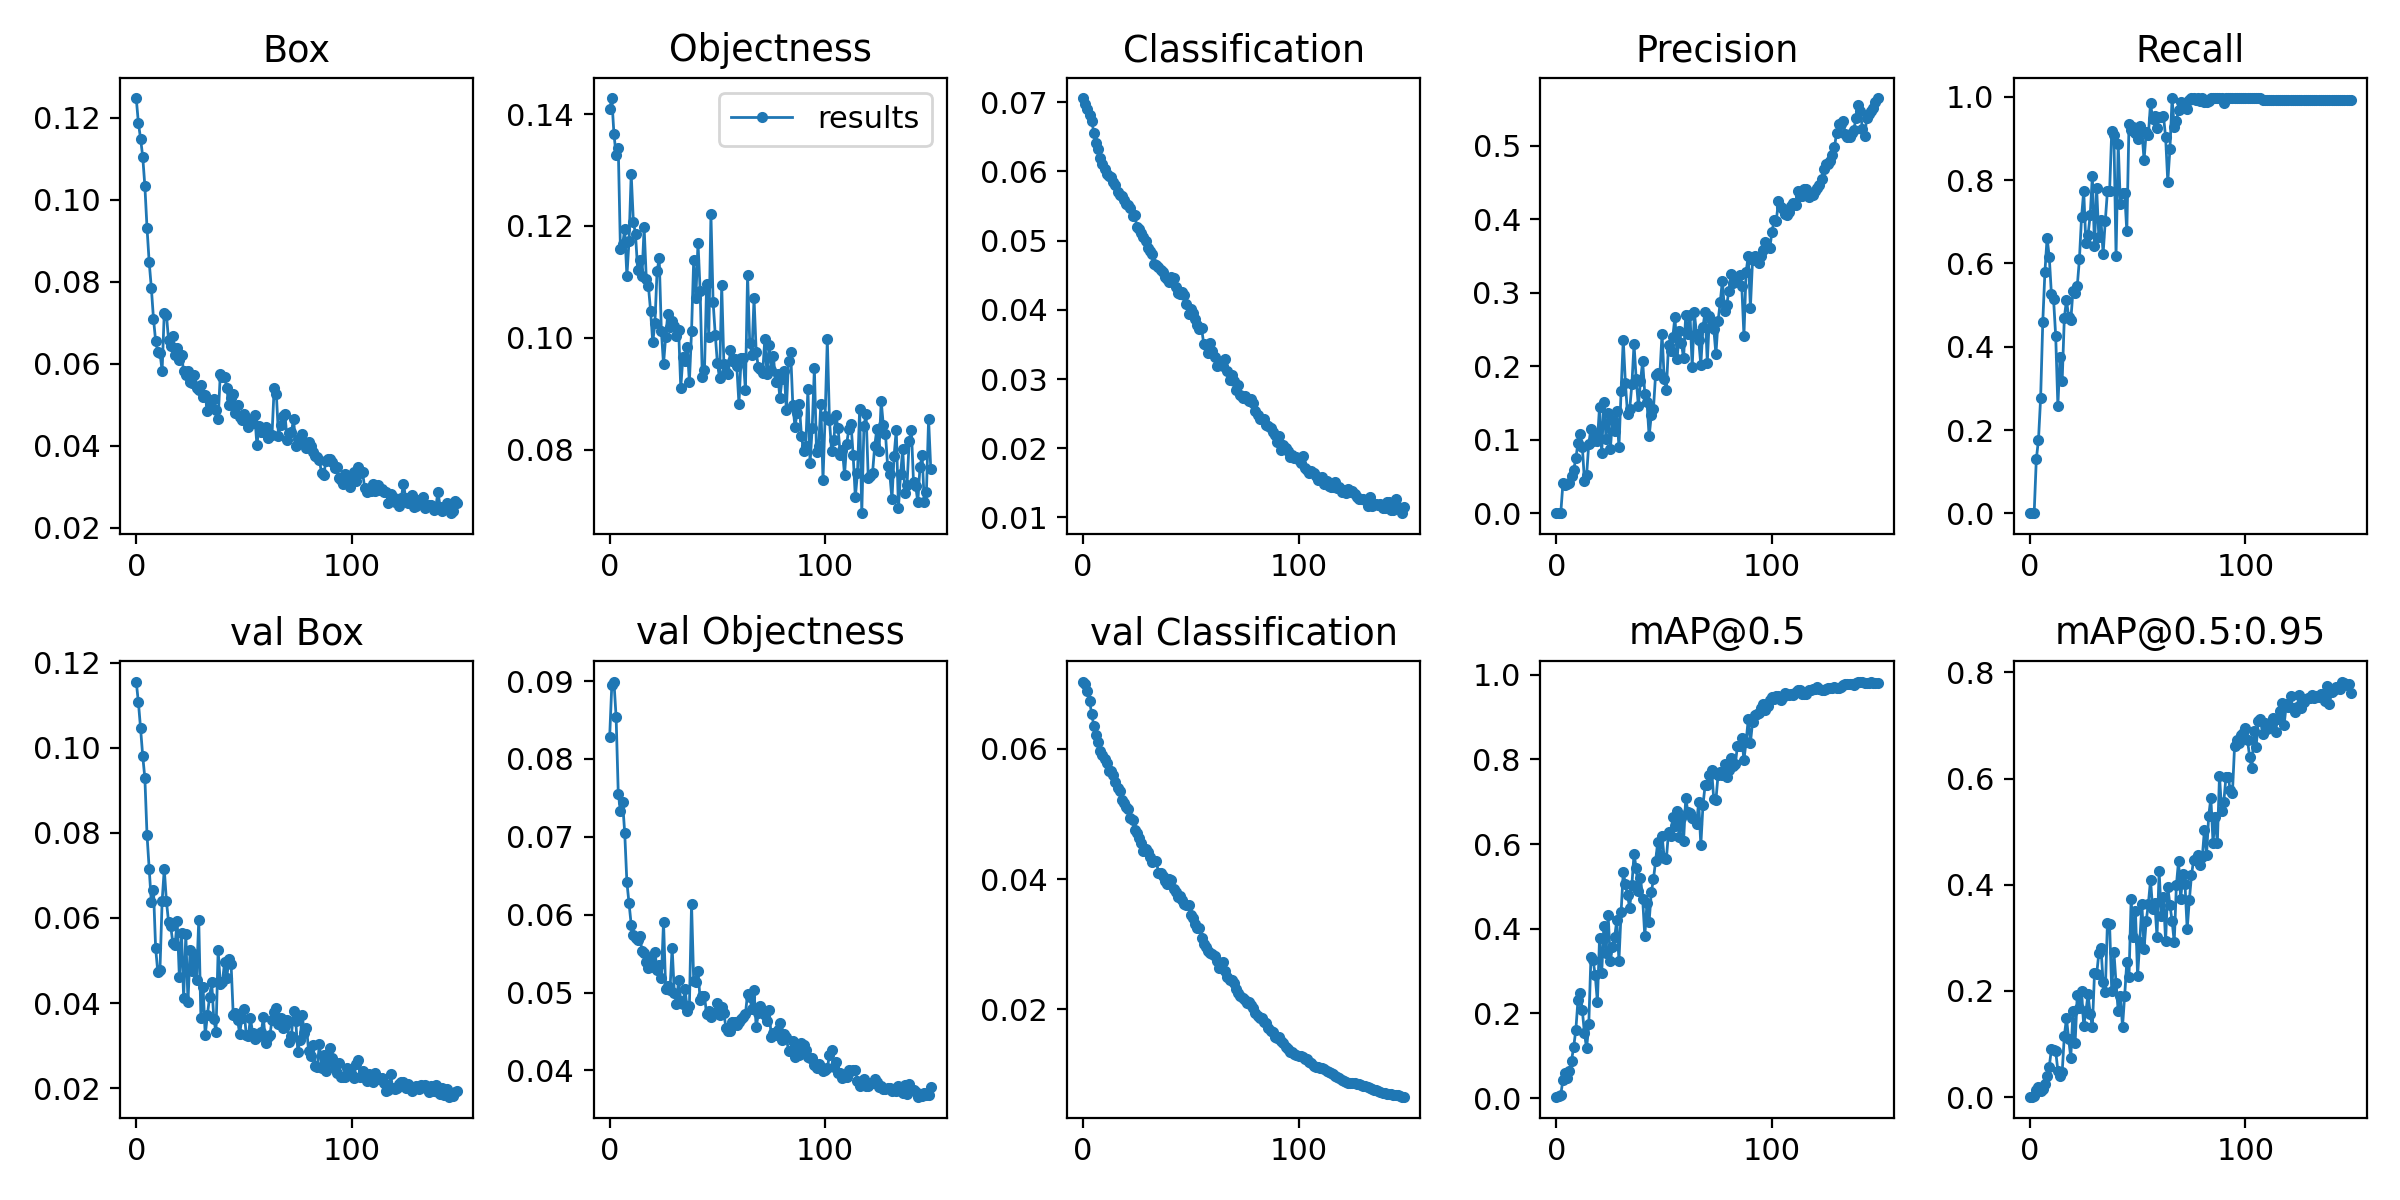

In [21]:
display(Image('runs/train/yolov5s_results/results.png'))


In [22]:
%cd /content/yolov5/
!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.5 --source ../test/images

/content/yolov5
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', exist_ok=False, img_size=416, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='../test/images', update=False, view_img=False, weights=['runs/train/yolov5s_results/weights/best.pt'])
Using torch 1.7.0+cu101 CUDA:0 (Tesla T4, 15079MB)

Fusing layers... 
Model Summary: 232 layers, 7276185 parameters, 0 gradients
image 1/29 /content/test/images/0b47311f426ff926578c9d738d683e76_jpg.rf.58093f799a6f56c30830617ca44745ca.jpg: 416x416 1 white-bishops, Done. (0.011s)
image 2/29 /content/test/images/1c0060ef868bdc326ce5e6389cb6732f_jpg.rf.a07af6147d4a79376c182d2d95c639ec.jpg: 416x416 1 white-rooks, Done. (0.010s)
image 3/29 /content/test/images/2f6fb003bb89cd401322a535acb42f65_jpg.rf.49b342a7b1f6de3f0e328beaf094a945.jpg: 416x416 1 black-kings, 2 black-knights, 8 black-pawns, 1 black-queens, 2 black-rooks, 2 white-bishops, 1 white-kings, 2 white-knights, 8

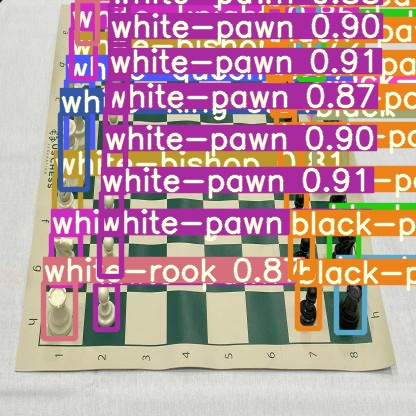

final time is : -0.004822492599487305




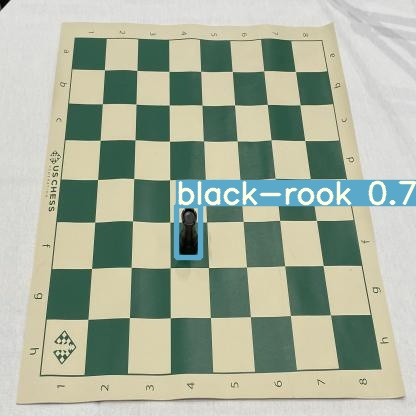

final time is : -0.004876852035522461




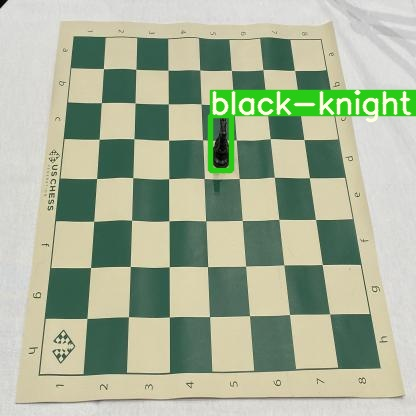

final time is : -0.0022869110107421875




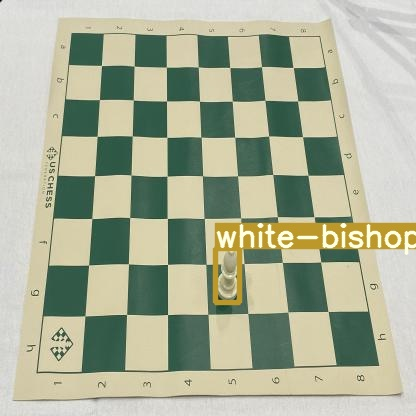

final time is : -0.0024819374084472656




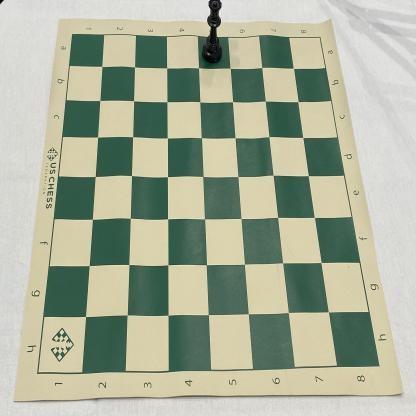

final time is : -0.0022826194763183594




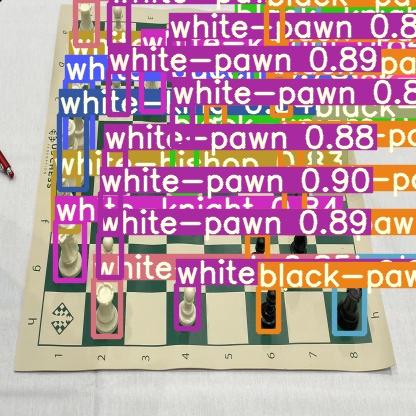

final time is : -0.003936767578125




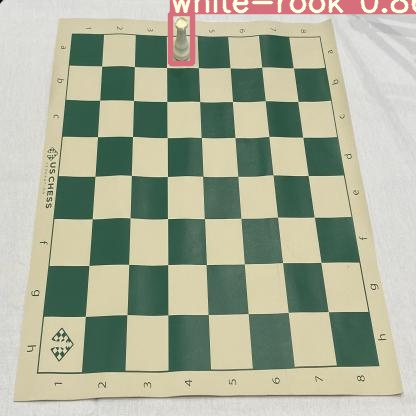

final time is : -0.0023441314697265625




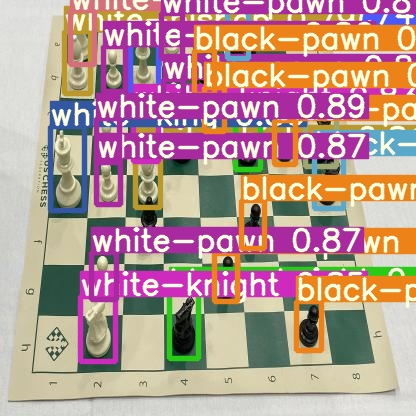

final time is : -0.0033342838287353516




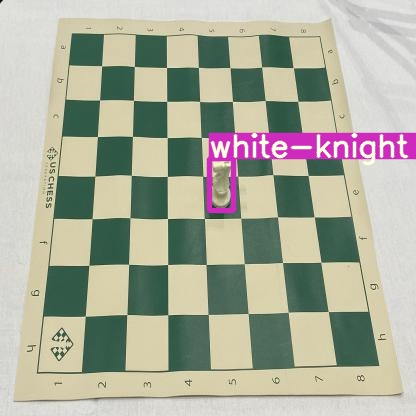

final time is : -0.0028891563415527344




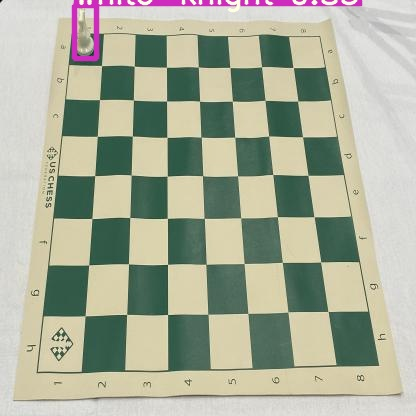

final time is : -0.0027794837951660156




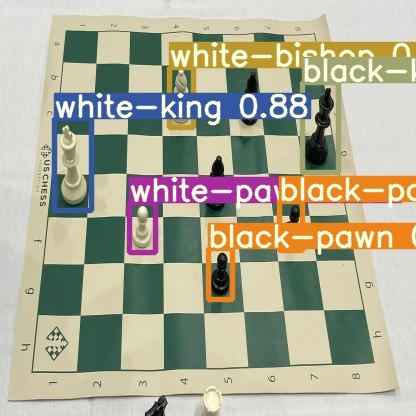

final time is : -0.005869626998901367




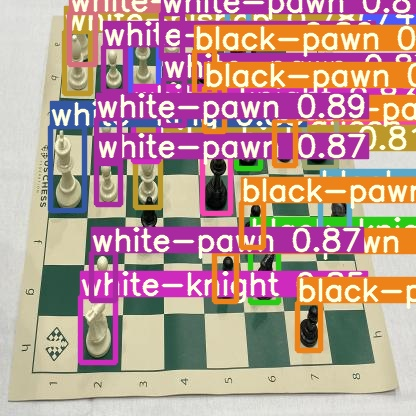

final time is : -0.0034809112548828125




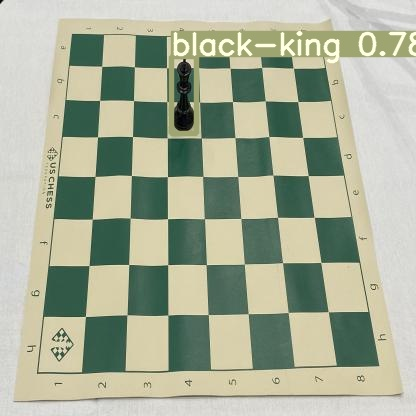

final time is : -0.004143476486206055




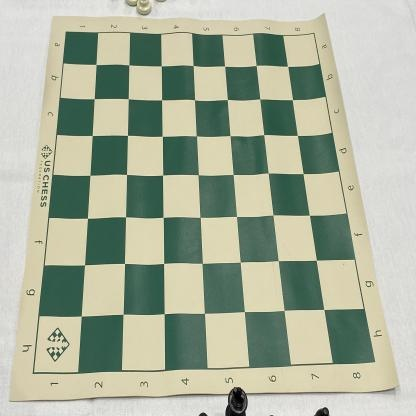

final time is : -0.0033674240112304688




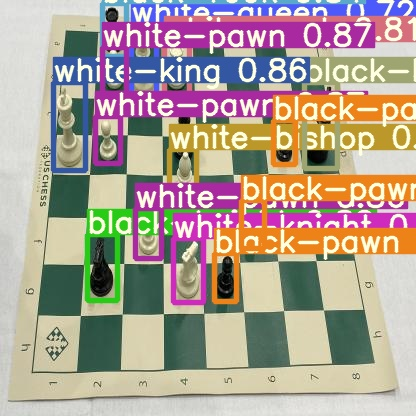

final time is : -0.003690481185913086




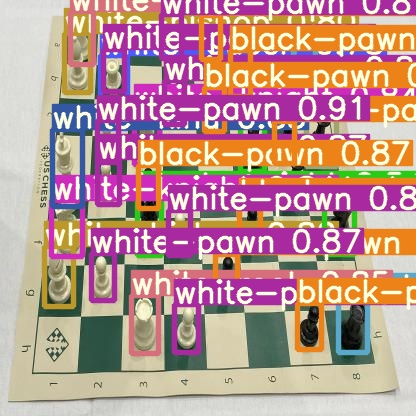

final time is : -0.003335237503051758




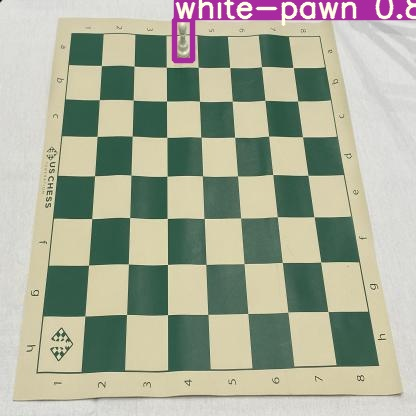

final time is : -0.0024361610412597656




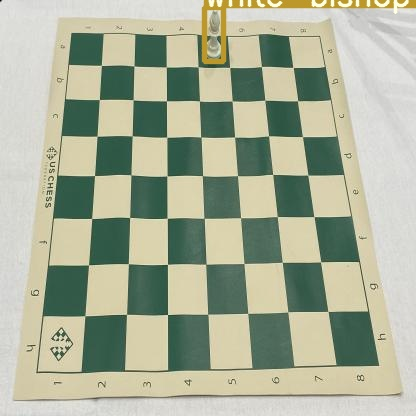

final time is : -0.005354404449462891




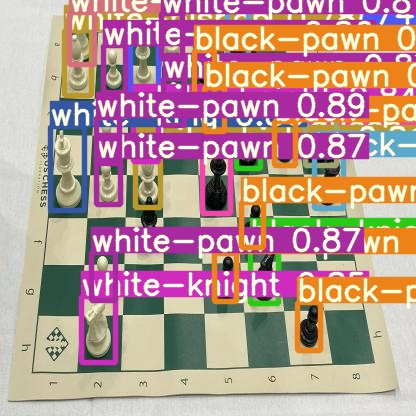

final time is : -0.015096187591552734




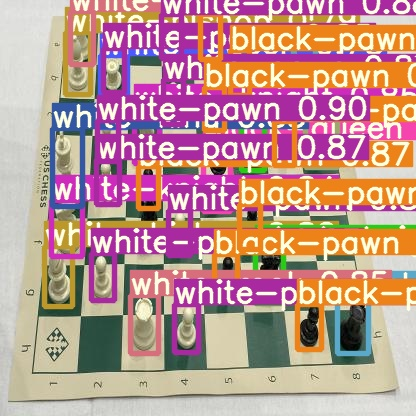

final time is : -0.0078277587890625




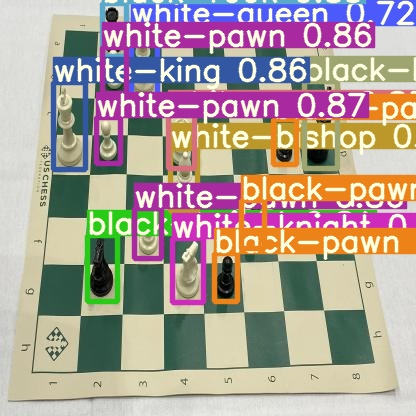

final time is : -0.004309892654418945




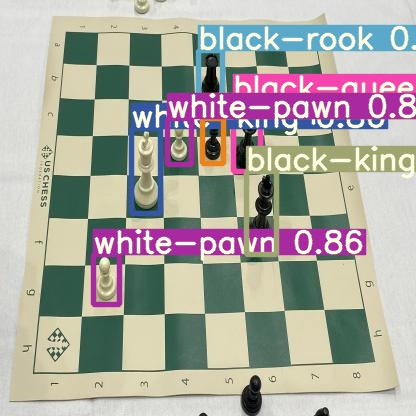

final time is : -0.0029566287994384766




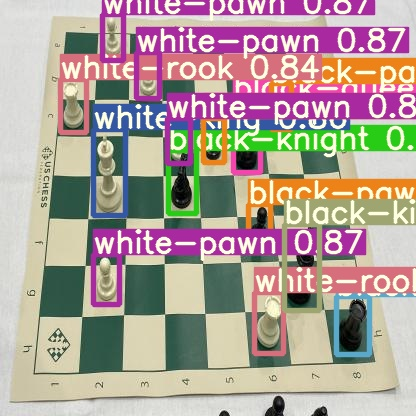

final time is : -0.0056934356689453125




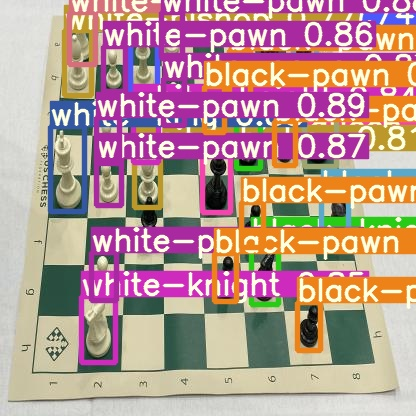

final time is : -0.010663270950317383




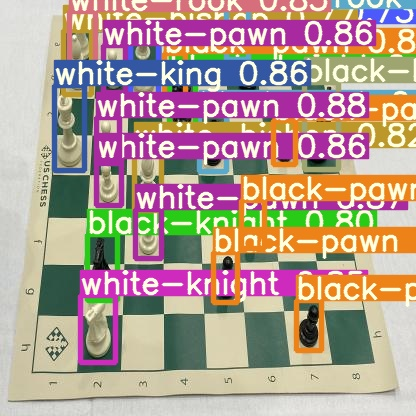

final time is : -0.003986835479736328




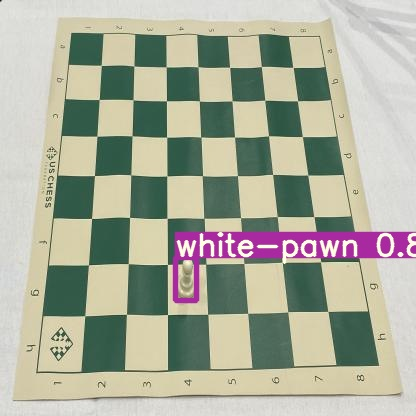

final time is : -0.004876375198364258




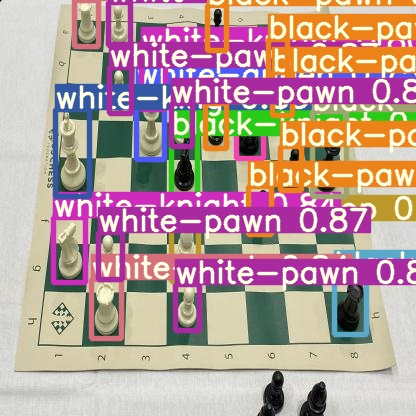

final time is : -0.003648042678833008




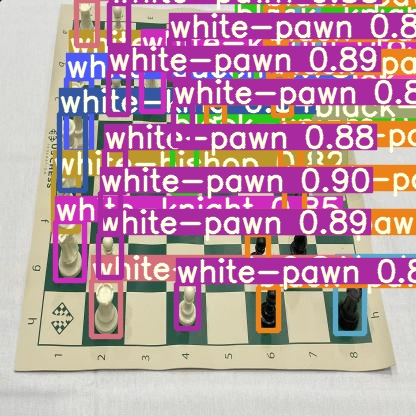

final time is : -0.006970643997192383




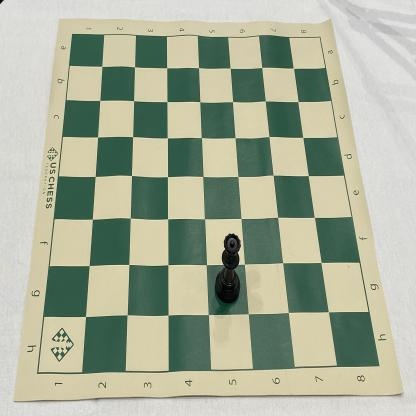

final time is : -0.0019979476928710938




In [23]:
import glob
from IPython.display import Image, display
import time

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'):
  start = time.time()
  display(Image(filename=imageName))
  end = time.time()
  print("final time is :",start-end)
  print("\n")

In [24]:
%cd /content/yolov5/
!python test.py --weights runs/train/yolov5s_results/weights/best.pt  --data '/content/data.yaml' --img 416 

/content/yolov5
Namespace(augment=False, batch_size=32, conf_thres=0.001, data='/content/data.yaml', device='', exist_ok=False, img_size=416, iou_thres=0.65, name='exp', project='runs/test', save_conf=False, save_json=False, save_txt=False, single_cls=False, task='val', verbose=False, weights=['runs/train/yolov5s_results/weights/best.pt'])
Using torch 1.7.0+cu101 CUDA:0 (Tesla T4, 15079MB)

Fusing layers... 
Model Summary: 232 layers, 7276185 parameters, 0 gradients
Scanning labels ../valid/labels.cache (58 found, 0 missing, 0 empty, 0 duplicate, for 58 images): 58it [00:00, 12685.49it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100% 2/2 [00:03<00:00,  1.84s/it]
                 all          58         386       0.544       0.993       0.982       0.782
Speed: 2.6/2.4/5.0 ms inference/NMS/total per 416x416 image at batch-size 32
Results saved to runs/test/exp
